In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
db = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/SolarPrediction.csv")

In [3]:
db = db.sort_values(['UNIXTime'], ascending = [True])
db.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [4]:
from datetime import datetime   #funções das 6 primeiras linhas
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
db.index =  pd.to_datetime(db['UNIXTime'], unit='s')
db.index = db.index.tz_localize(pytz.utc).tz_convert(hawaii)
db['MonthOfYear'] = db.index.strftime('%m').astype(int)
db['DayOfYear'] = db.index.strftime('%j').astype(int)
db['WeekOfYear'] = db.index.strftime('%U').astype(int)
db['TimeOfDay(h)'] = db.index.hour
db['TimeOfDay(m)'] = db.index.hour*60 + db.index.minute
db['TimeOfDay(s)'] = db.index.hour*60*60 + db.index.minute*60 + db.index.second
db['TimeSunRise'] = pd.to_datetime(db['TimeSunRise'], format='%H:%M:%S')
db['TimeSunSet'] = pd.to_datetime(db['TimeSunSet'], format='%H:%M:%S')
db['DayLength(s)'] = db['TimeSunSet'].dt.hour*60*60 \
                           + db['TimeSunSet'].dt.minute*60 \
                           + db['TimeSunSet'].dt.second \
                           - db['TimeSunRise'].dt.hour*60*60 \
                           - db['TimeSunRise'].dt.minute*60 \
                           - db['TimeSunRise'].dt.second
db.drop(['Data','Time','TimeSunRise','TimeSunSet','UNIXTime'], inplace=True, axis=1)
db.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060


In [5]:
X = db.drop('Radiation', axis = 1)
X = StandardScaler().fit_transform(X)
y = db['Radiation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Training MLPRegressor...")
reg = MLPRegressor(hidden_layer_sizes =(20,20,20,20,20 ),solver='adam',activation = 'relu',learning_rate='adaptive',learning_rate_init = 0.1,max_iter=10000, shuffle = False)
reg.fit(X_train,y_train)

Training MLPRegressor...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Resultados
Mean squared error: 10419.30
Variance score: 0.90


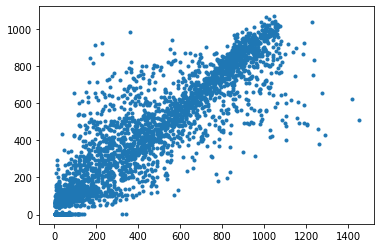

In [6]:
y_predict= reg.predict(X_test)
print("Resultados")
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print('Variance score: %.2f' % r2_score(y_test, y_predict))
plt.scatter(y_test,y_predict,marker='.')
plt.show()

teste de overfiting
Mean squared error: 9504.25
Variance score: 0.90


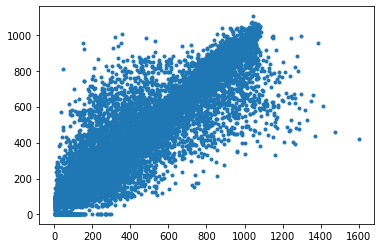

In [7]:
y_predict_train = reg.predict(X_train)
print("teste de overfiting")
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_predict_train))
print('Variance score: %.2f' % r2_score(y_train, y_predict_train))
plt.scatter(y_train,y_predict_train,marker='.')
plt.show()
